### Load libraries
Make sure that you have the latest version of *phase_portraits.py* in the same directory as you're running this Jupyter notebook from. It can be downloaded from: 
[https://mitt.uib.no/courses/45546/files/folder/Jupyter%20files](https://mitt.uib.no/courses/45546/files/folder/Jupyter%20files) 

In [6]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
#import phase_portraits as pp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

## Bifurcation in 1D


Look at the following 1D problems with a parameter $\mu$: 
$$ \begin{array}{rcl}
\dot{x} &=& \mu + x^2 \\
\dot{x} &=& \mu - x^2 \\
\dot{x} &=& \mu x - x^3 \\
\dot{x} &=& \mu x + x^3 \\
\dot{x} &=& \mu x + x^3 + x^5 
\end{array}
$$

Plot the right hand side of the problems for different values of $\mu$. Based on this, find the fixed point (also called critical points, equilibrium points) and determine their stabilities. 

A first example below. 

interactive(children=(FloatSlider(value=2.0, description='mu', max=2.0, min=-2.0), Output()), _dom_classes=('w…

<function __main__.plot_func(mu)>

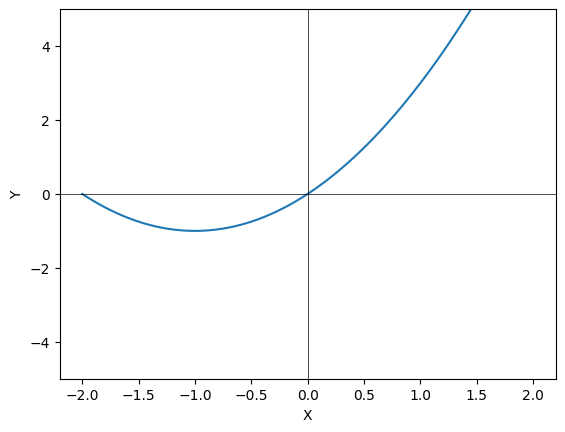

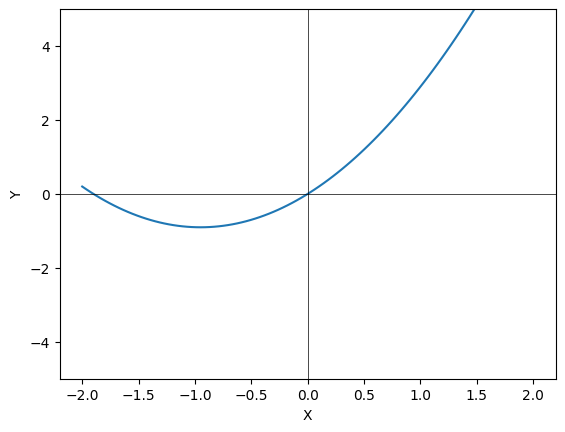

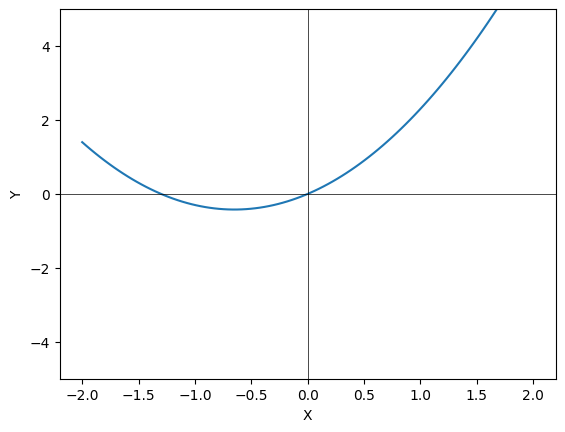

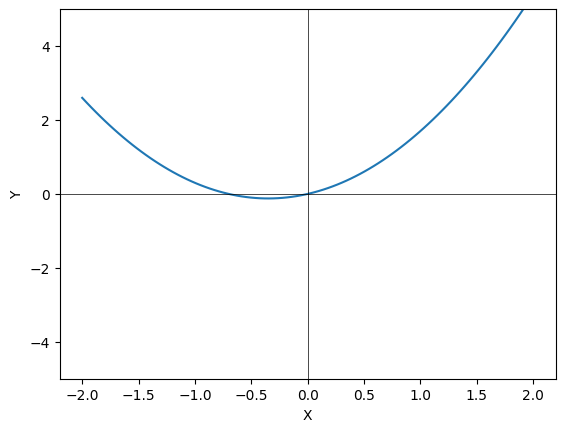

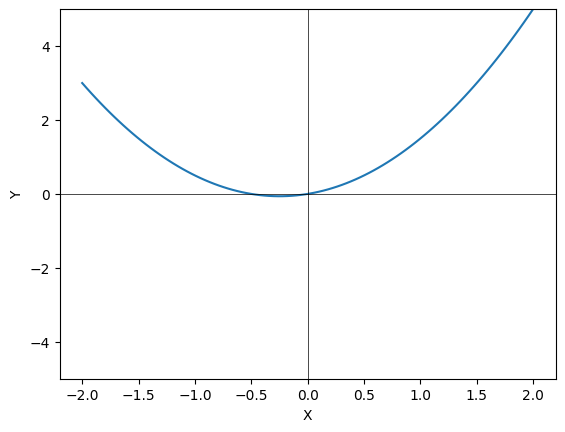

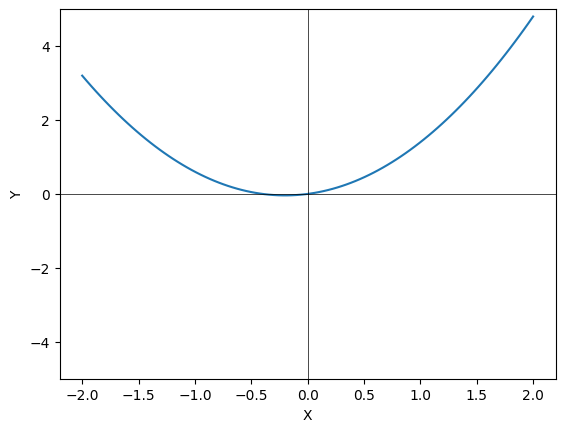

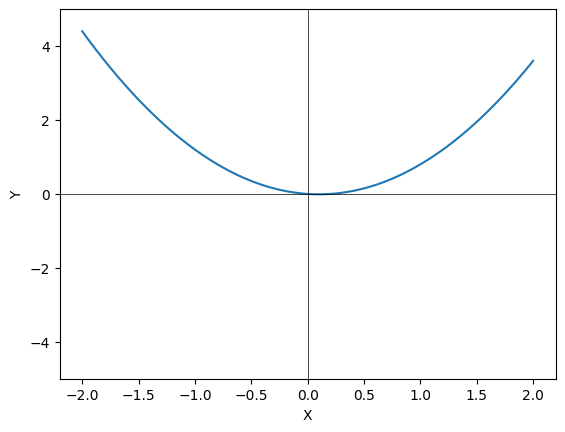

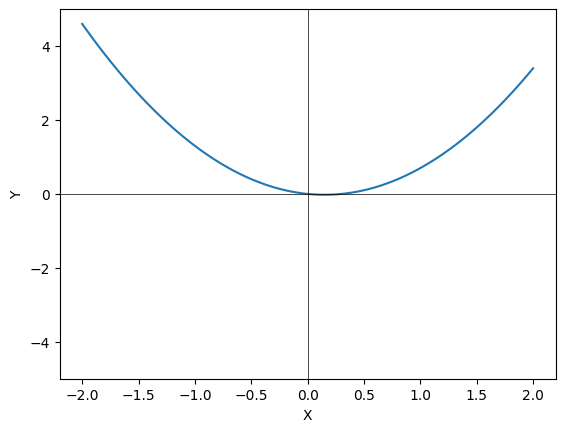

In [7]:
def plot_func(mu): # This function calculates the 
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    #ax.set_aspect('equal')
    xrange=[-2,2]
    x=np.linspace(xrange[0],xrange[1],100)

    y= mu*x+x**2
    
    ax=ax.plot(x,y)
    plt.axhline(0, color='black', linewidth=.5)
    plt.axvline(0, color='black', linewidth=.5)
    ax=plt.ylim([-5,5])
    

interact(plot_func, mu = widgets.FloatSlider(value=2,
                                               min=-2,
                                               max=2,
                                               step=0.1))

# 2D
Look at the following 2D problems: 
$$ \begin{array}{rclrcll}

\dot{x} &=& \mu - x^2 & \dot{y} &=&-y \hspace{1cm}  & {Saddle \ node}\\ 
\dot{x} &=& \mu x - x^2 & \dot{y} &=&-y & {Transcritical}\\ 
\dot{x} &=& \mu x - x^3 & \dot{y} &=&-y & {Supercritical \ pitchfork}\\ 
\dot{x} &=& \mu x + x^3 & \dot{y} &=&-y & {Subcritical \ pitchfork}\\ 

\dot{x} &=& (\mu- (x^2 + y^2))x-y & \dot{y} &=&(\mu- (x^2 + y^2))y+x & {Supercritical \ Hopf}\\ 
\end{array}
$$

Plot the flow for different values of the parameter $\mu$.

The functions evaluating the right hand side is given below. 


In [4]:
def rhs_sn(t,xy,mu=-1):
    x,y=xy
    dx=mu-x**2
    dy=-y
    return [dx,dy]

def rhs_transcrit(t,xy,mu=-1):
    x,y=xy
    dx=mu*x-x**2
    dy=-y
    return [dx,dy]

def rhs_super_pitch(t,xy,mu=-1):
    x,y=xy
    dx=mu*x-x**3
    dy=-y
    return [dx,dy]

def rhs_sub_pitch(t,xy,mu=-1):
    x,y=xy
    dx=mu*x+x**3
    dy=-y
    return [dx,dy]

def rhs_sup_hopf(t,xy,mu=-1):
    x,y=xy
    dx=(mu-(x**2+y**2))*x-y
    dy=(mu-(x**2+y**2))*y+x
    return [dx,dy]


interactive(children=(FloatSlider(value=-1.0, description='mu', max=1.0, min=-1.0), Output()), _dom_classes=('…

<function __main__.plot_func(mu)>

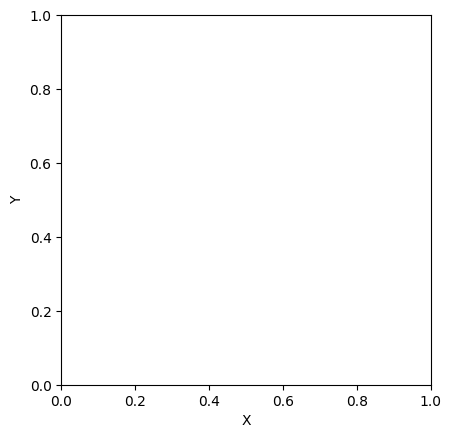

In [5]:
def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    ax=pp.plot_flow(ax,rhs_sn,xrange=[-2,2],yrange=[-2,2],nullclines=True,  args=mu)


interact(plot_func, mu = widgets.FloatSlider(value=-1,
                                               min=-1,
                                               max=1.0,
                                               step=0.1))

# Subcritical Hopf
This problem is given in polar coordinates. So $x=r cos(\theta)$ and $y=r sin(\theta)$, where $r$ is the distance from origo and $theta$ is the angle between the position vector and the positive $x€-axis. 

$$ \begin{array}{rcl}

\dot{r} &=& \mu r + r^3 - r^5 \\
\dot{\theta} &=&-1 \\ 

\end{array}
$$

When $\dot{r}=0$ the paths will have constant distance, $r$, to origin. This happens when 
$$
 -r(r-r_{-})(r-r_{+})=0
$$
where 
$$
\begin{array}{rclcl}
 r &=& 0 \\
 r &=& r_{-} &=& \sqrt{\frac{1}{2}\left(1-\sqrt{1+r\mu} \right)} \\
 r &=& r_{+} &=& \sqrt{\frac{1}{2}\left(1+\sqrt{1+r\mu} \right)}\\
\end{array}
$$

Use the slider in the figure below to see how the two limit cycles occur, how the unstable inner collide with the stable origin, making it unstable. 

In [5]:
def rhs_sub_hopf(t,xy,mu=-1): # Define the right hand side.
    # In order to use the phase_portraits.py file we need to be in the (x,y) coordinates. 
    x,y=xy
    r=np.sqrt(x**2+y**2) # Calculate the distance from origo.
    theta=np.arctan2(y,x) # Calculate theta.
    dr= mu*r+r**3-r**5 # calculate dr/dt.
    dtheta= -1 # Calculate d theta/dt.
    dx=dr*np.cos(theta)-r*dtheta*np.sin(theta) # Find dx/dt.
    dy=dr*np.sin(theta)+r*dtheta*np.cos(theta) # and dy/dt.
    return [dx,dy]


In [6]:
def plot_func(mu):
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    

    ax=pp.plot_flow(ax,rhs_sub_hopf,xrange=[-2.,2],yrange=[-2,2],nullclines=True,  args=mu) # This plots the flow
    ax=pp.plot_solution(ax,rhs_sub_hopf,y0=[0.1,0.],t_end=100,t_dim=2000,color='green',init_pt=False,linewidth=2.5,args=[mu]) # In these two lines we plot two paths
    ax=pp.plot_solution(ax,rhs_sub_hopf,y0=[1.9,0.],t_end=100,t_dim=2000,color='orange',init_pt=False,linewidth=1.5,args=[mu]) # change y0 to plot others. 
    if (mu >= -0.25): # Check if we get imaginary values for the innermost square root. 
        r_plus=np.sqrt(0.5+0.5*np.sqrt(1+4*mu))
        if ((0.5-0.5*np.sqrt(1+4*mu))>=0): # Check if the outer square root gives an imaginary number, i.e the inner limit cycle doesn't exist.
            r_minus=np.sqrt(0.5-0.5*np.sqrt(1+4*mu))
            ax=pp.plot_jordan(ax,rhs_sub_hopf,r0=[0,0],rr=r_minus,num=25,vectors=False, color='blue',linewidth=2.5,linestyle='dashed',args=[mu]) # Jordan curve for the outer limit cycle. 
            ax=pp.plot_solution(ax,rhs_sub_hopf,y0=[r_minus+0.01,0.],t_end=100,t_dim=2000,color='blue',init_pt=False,linewidth=1.,args=[mu])
            ax=pp.plot_solution(ax,rhs_sub_hopf,y0=[r_minus-0.01,0.],t_end=100,t_dim=2000,color='blue',init_pt=False,linewidth=1.,args=[mu])
        ax=pp.plot_jordan(ax,rhs_sub_hopf,r0=[0,0],rr=r_plus,num=25,vectors=False, color='orange',linewidth=2.5,args=[mu]) # Jordan curve for the outer limit cycle. 

interact(plot_func, mu = widgets.FloatSlider(value=-0.3,
                                               min=-0.3,
                                               max=0.05,
                                               step=0.01))

interactive(children=(FloatSlider(value=-0.3, description='mu', max=0.05, min=-0.3, step=0.01), Output()), _do…

<function __main__.plot_func(mu)>